#### Imports

In [1]:
# from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from matplotlib import style
import seaborn as sns
from sqlalchemy import text, create_engine

In [3]:
import env

In [4]:
df = pd.read_csv('anonymized-curriculum-access.txt')

In [7]:
def acquire_logs(user=env.username, password=env.password, host=env.host):
    '''
    Function will utilize: username, password, & host from env file.
    Output: df containing curriculum log data from Codeup
    '''
    url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/curriculum_logs'
    query = '''
    select * 
    from logs
    join cohorts on logs.cohort_id = cohorts.id
    '''
    df = pd.read_sql(query, url)
    return df

In [ ]:
def get_logs_data(filename="logs.csv"):
    """
    This function will:
    - Check local directory for csv file
        - return if exists
    - If csv doesn't exists:
        - create a df of the SQL_query
        - write df to csv
    - Output logs df
    """
    if os.path.exists(filename):
        df = pd.read_csv(filename, index_col=0) 
        print('Found CSV')
        return df
    
    else:
        df = acquire_logs()
        
        #want to save to csv
        df.to_csv(filename)
        print('Creating CSV')
        return df

In [377]:
df = acquire_logs()

In [379]:
df.to_csv('logs.csv', index=False)

In [10]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847330 entries, 0 to 847329
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        847330 non-null  object 
 1   time        847330 non-null  object 
 2   path        847329 non-null  object 
 3   user_id     847330 non-null  int64  
 4   cohort_id   847330 non-null  float64
 5   ip          847330 non-null  object 
 6   id          847330 non-null  int64  
 7   name        847330 non-null  object 
 8   slack       847330 non-null  object 
 9   start_date  847330 non-null  object 
 10  end_date    847330 non-null  object 
 11  created_at  847330 non-null  object 
 12  updated_at  847330 non-null  object 
 13  deleted_at  0 non-null       object 
 14  program_id  847330 non-null  int64  
dtypes: float64(1), int64(3), object(11)
memory usage: 97.0+ MB


In [13]:
df = df.drop(columns=['id', 'slack', 'created_at', 'updated_at', 'deleted_at'])

In [14]:
df.head()

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2


In [15]:
df.shape

(847330, 10)

In [19]:
df.name.value_counts()

Staff         84031
Ceres         40730
Zion          38096
Jupiter       37109
Fortuna       36902
Voyageurs     35636
Ganymede      33844
Apex          33568
Deimos        32888
Darden        32015
Teddy         30926
Hyperion      29855
Betelgeuse    29356
Ulysses       28534
Europa        28033
Xanadu        27749
Bayes         26538
Wrangell      25586
Andromeda     25359
Kalypso       23691
Curie         21582
Yosemite      20743
Bash          17713
Luna          16623
Marco         16397
Easley        14715
Lassen         9587
Arches         8890
Florence       8562
Sequoia        7444
Neptune        7276
Olympic        4954
Kings          2845
Pinnacles      2158
Hampton        1712
Oberon         1672
Quincy         1237
Niagara         755
Mammoth         691
Glacier         598
Joshua          302
Ike             253
Badlands         93
Franklin         72
Apollo            5
Denali            4
Everglades        1
Name: name, dtype: int64

## Prepare

In [25]:
df['date_time'] = pd.to_datetime(df.date + ' ' + df.time)

In [28]:
df = df.set_index('date_time')

In [39]:
df = df.drop(columns=['date','time'])

In [43]:
df.cohort_id = df.cohort_id.astype('int')

In [50]:
df.start_date = df.start_date.astype('datetime64')

In [51]:
df.end_date = df.end_date.astype('datetime64')

In [52]:
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
date_time,,,,,,,,
2018-01-26 09:55:03,/,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:24,javascript-i/conditionals,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847330 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   path        847329 non-null  object        
 1   user_id     847330 non-null  int64         
 2   cohort_id   847330 non-null  int64         
 3   ip          847330 non-null  object        
 4   name        847330 non-null  object        
 5   start_date  847330 non-null  datetime64[ns]
 6   end_date    847330 non-null  datetime64[ns]
 7   program_id  847330 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 58.2+ MB


<AxesSubplot:xlabel='date_time'>

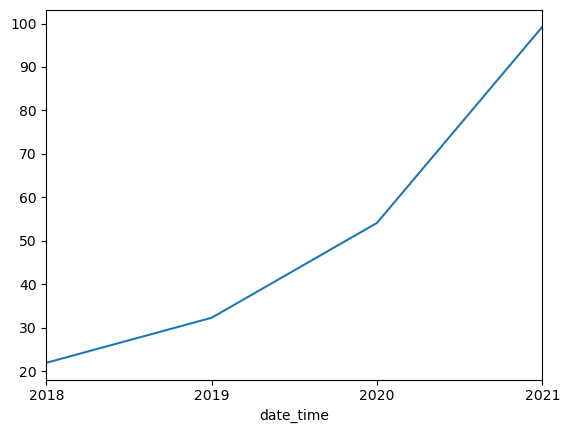

In [37]:
df.resample('Y').cohort_id.mean().plot()

In [381]:
def prep_logs(df):
    '''
    Input: curriculum logs df
    Actions: drop unused and duplicate columns, set datetime, reset index to datetime, set cohort id to int
    Output: cleaned df
    '''
    df = df.drop(columns=['id', 'slack', 'created_at', 'updated_at', 'deleted_at'])
    df['date_time'] = pd.to_datetime(df.date + ' ' + df.time)
    df = df.set_index('date_time')
    df = df.drop(columns=['date','time'])
    df.cohort_id = df.cohort_id.astype('int')
    df.start_date = df.start_date.astype('datetime64')
    df.end_date = df.end_date.astype('datetime64')
    df = df[(df.path != '/')
        & (df.path != 'toc')
        & (df.path != 'search/search_index.json')]
    return df

In [382]:
df = prep_logs(df)

In [383]:
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
date_time,,,,,,,,
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:24,javascript-i/conditionals,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2
2018-01-26 09:56:41,javascript-i/loops,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2


In [70]:
df[df.program_id==1].ip.value_counts()

97.105.19.58      11172
97.105.19.61       7298
216.1.153.162       823
67.10.174.56        720
67.10.161.55        651
                  ...  
12.208.132.3          1
107.77.217.101        1
173.123.121.68        1
134.196.131.92        1
70.125.158.82         1
Name: ip, Length: 320, dtype: int64

In [127]:
df.program_id.value_counts()

2    713365
3    103412
1     30548
4         5
Name: program_id, dtype: int64

In [147]:
df[df.program_id == 1].user_id.nunique()

98

In [146]:
df[df.program_id == 2].user_id.nunique()

722

In [145]:
df[df.program_id == 3].user_id.nunique()

111

In [150]:
df

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
date_time,,,,,,,,
2018-01-26 09:55:03,/,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:24,javascript-i/conditionals,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2
...,...,...,...,...,...,...,...,...
2021-04-21 16:41:51,jquery/personal-site,64,28,71.150.217.33,Staff,2014-02-04,2014-02-04,2
2021-04-21 16:42:02,jquery/mapbox-api,64,28,71.150.217.33,Staff,2014-02-04,2014-02-04,2
2021-04-21 16:42:09,jquery/ajax/weather-map,64,28,71.150.217.33,Staff,2014-02-04,2014-02-04,2


1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?


2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?


3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?


filter between start and stop == datetime stamp

value counts of user id (if necessary, group by program id)

In [86]:
stud_acc_act = df[(df.index >= df.start_date) & (df.index <= df.end_date)]

In [112]:
stud_acc_act

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
date_time,,,,,,,,
2018-01-26 09:56:24,javascript-i/conditionals,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2
2018-01-26 09:56:41,javascript-i/loops,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2
2018-01-26 09:56:46,javascript-i/conditionals,3,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2
2018-01-26 09:56:48,javascript-i/functions,3,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2
2018-01-26 09:56:59,javascript-i/loops,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2
...,...,...,...,...,...,...,...,...
2021-04-21 16:36:09,jquery/personal-site,869,135,136.50.98.51,Marco,2021-01-25,2021-07-19,2
2021-04-21 16:36:34,html-css/css-ii/bootstrap-grid-system,948,138,104.48.214.211,Neptune,2021-03-15,2021-09-03,2
2021-04-21 16:37:48,java-iii,834,134,67.11.50.23,Luna,2020-12-07,2021-06-08,2


In [106]:
stud_acc_act.user_id.value_counts()

344    4763
570    4075
685    3223
671    3193
555    3086
       ... 
832       3
879       1
940       1
918       1
619       1
Name: user_id, Length: 731, dtype: int64

In [151]:
stud_acc_act.user_id.value_counts() < 101

344    False
570    False
685    False
671    False
555    False
       ...  
832     True
879     True
940     True
918     True
619     True
Name: user_id, Length: 731, dtype: bool

In [ ]:
# Get the value counts of the 'user_id' column
value_counts = df['user_id'].value_counts()

# Filter the DataFrame based on the condition
filtered_df = df[df['user_id'].isin(value_counts[value_counts < 150].index)]


In [114]:
stud_acc_act.user_id

date_time
2018-01-26 09:56:24      2
2018-01-26 09:56:41      2
2018-01-26 09:56:46      3
2018-01-26 09:56:48      3
2018-01-26 09:56:59      2
                      ... 
2021-04-21 16:36:09    869
2021-04-21 16:36:34    948
2021-04-21 16:37:48    834
2021-04-21 16:38:14    834
2021-04-21 16:41:51    875
Name: user_id, Length: 647198, dtype: int64

In [152]:
under_ach = stud_acc_act.user_id.value_counts() [stud_acc_act.user_id.value_counts() < 101].index
sorted(under_ach)

[13,
 24,
 33,
 36,
 41,
 45,
 46,
 49,
 52,
 55,
 56,
 57,
 64,
 65,
 250,
 253,
 278,
 340,
 371,
 388,
 487,
 529,
 539,
 543,
 572,
 619,
 679,
 697,
 702,
 734,
 741,
 772,
 806,
 812,
 832,
 839,
 858,
 879,
 889,
 918,
 940,
 941,
 954,
 955,
 956,
 958,
 959,
 960,
 961,
 962,
 963,
 964,
 965,
 967,
 968,
 969,
 971,
 972,
 973,
 974,
 975,
 976,
 977,
 978,
 981]

In [154]:
under_ach_df = stud_acc_act[stud_acc_act.user_id.isin(under_ach)]

In [167]:
under_ach_df

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
date_time,,,,,,,,
2018-01-26 10:33:25,javascript-i/functions,13,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2
2018-01-26 11:24:17,appendix,24,21,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2
2018-01-26 11:24:29,appendix/capstone-workbook,24,21,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2
2018-01-26 11:25:23,javascript-i/conditionals,13,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2
2018-01-26 11:49:07,appendix,33,21,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2
...,...,...,...,...,...,...,...,...
2021-04-21 12:13:13,javascript-i,969,139,107.77.169.64,Oberon,2021-04-12,2021-10-01,2
2021-04-21 12:13:18,javascript-i/testing-user-functions,969,139,107.77.169.64,Oberon,2021-04-12,2021-10-01,2
2021-04-21 12:31:48,javascript-i,969,139,107.77.169.64,Oberon,2021-04-12,2021-10-01,2


In [583]:
under_ach_df[under_ach_df.cohort_id == 21]

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
date_time,,,,,,,,
2018-01-26 11:24:17,appendix,24,21,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2
2018-01-26 11:24:29,appendix/capstone-workbook,24,21,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2
2018-01-26 11:49:07,appendix,33,21,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2
2018-01-26 11:49:11,appendix/capstone-workbook,33,21,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2
2018-01-26 12:33:51,/,36,21,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2
...,...,...,...,...,...,...,...,...
2018-02-13 20:32:50,java-i/syntax-types-and-variables,36,21,173.174.159.45,Sequoia,2017-09-27,2018-02-15,2
2018-02-13 20:32:55,java-i/introduction-to-java,36,21,173.174.159.45,Sequoia,2017-09-27,2018-02-15,2
2018-02-13 20:33:04,java-i/syntax-types-and-variables,36,21,173.174.159.45,Sequoia,2017-09-27,2018-02-15,2


In [582]:
df[['end_date']].sort_values(by='end_date', ascending=True).tail(60)

,end_date
date_time,
2021-04-20 15:39:15,2021-10-01
2021-04-20 16:55:25,2021-10-01
2021-04-20 00:53:51,2021-10-01
2021-04-15 11:55:47,2021-10-01
2021-04-13 18:56:44,2021-10-01
2021-04-13 18:57:54,2021-10-01
2021-04-13 18:57:59,2021-10-01
2021-04-13 18:58:44,2021-10-01
2021-04-13 19:09:59,2021-10-01


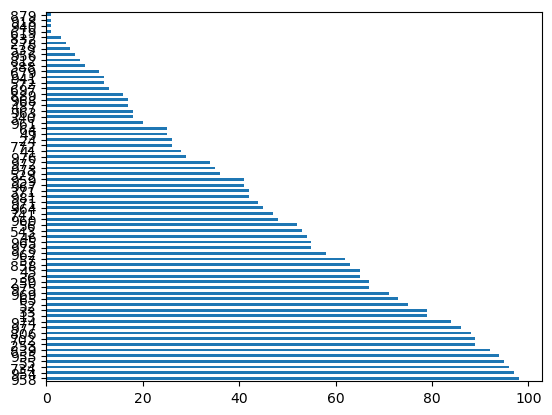

In [204]:
under_ach_df.user_id.value_counts().plot.barh();

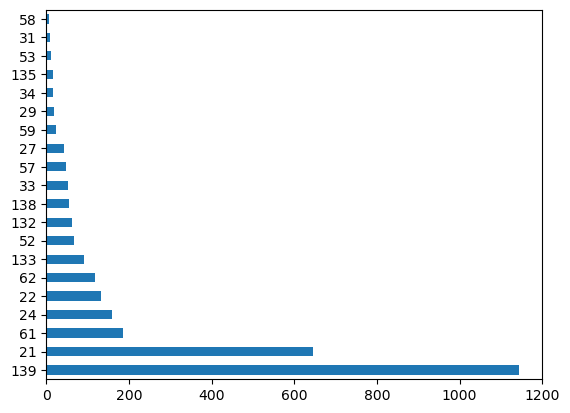

In [205]:
under_ach_df.cohort_id.value_counts().plot.barh();

<AxesSubplot:xlabel='cohort_id'>

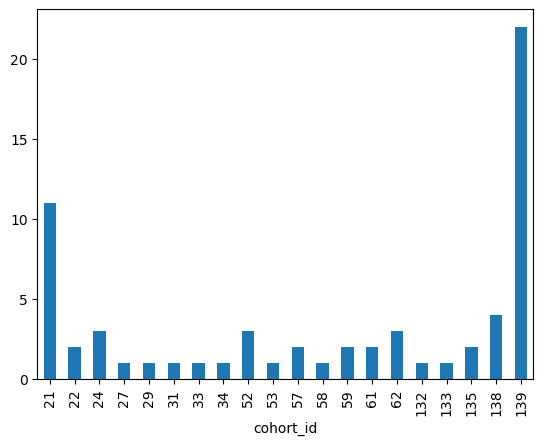

In [244]:
under_ach_df.groupby('cohort_id').user_id.nunique().plot.bar()

In [231]:
under_ach_df.groupby('cohort_id').user_id.nunique()

cohort_id
21     11
22      2
24      3
27      1
29      1
31      1
33      1
34      1
52      3
53      1
57      2
58      1
59      2
61      2
62      3
132     1
133     1
135     2
138     4
139    22
Name: user_id, dtype: int64

In [230]:
df.groupby('cohort_id').user_id.nunique()

cohort_id
1      18
2       3
4       1
5       1
6       2
7       6
8       5
9       1
11      5
12      5
13     10
14     13
15      5
16      8
17     14
18     14
19     17
21     28
22     35
23     33
24     34
25     26
26     20
27     29
28     51
29     25
31     28
32     22
33     29
34     23
51     27
52     28
53     29
55     21
56     24
57     29
58     23
59     29
61     23
62     33
132    23
133    17
134    20
135    31
137    21
138    37
139    26
Name: user_id, dtype: int64

In [232]:
22/26

0.8461538461538461

In [233]:
11/28

0.39285714285714285

<AxesSubplot:xlabel='program_id'>

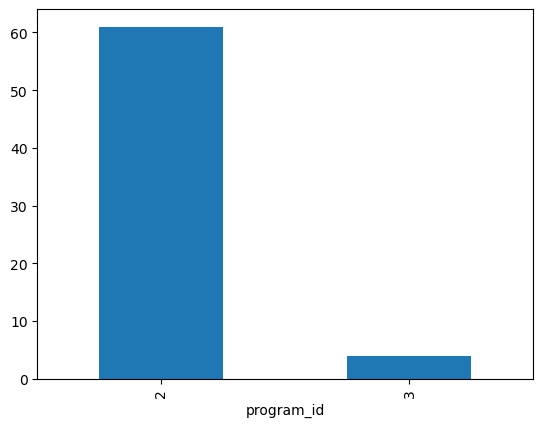

In [238]:
under_ach_df.groupby('program_id').user_id.nunique().plot.bar()

- The 2 cohorts who had the most amount of students who accessed the curriculum the least were:
    1. cohort 139 (Oberon) program 2
        - 85% of students are in this category
    2. cohort 21 (Sequoia) program 2
        - 39% of students are in this category
- Program 2 had the most students who accessed the curriculum the least

Question # 3 - Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

During exploration, we found that the cohort who had the least active students in terms of accessing the codeup curriculum was Sequoia, cohort 21. 11 out of 28 students or 39% accessed the curriculum under 100 times throughout their time at Codeup. WebDev students accessed the curriculum the least. 

<AxesSubplot:>

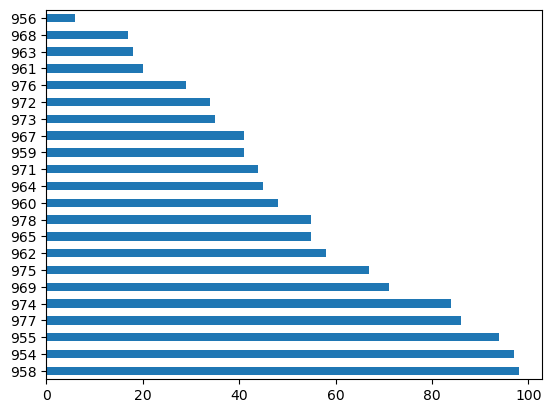

In [223]:
under_ach_df[under_ach_df.cohort_id==139].user_id.value_counts().plot.barh()

In [201]:
under_ach_df.user_id.value_counts().reset_index()

,index,user_id
0,958,98
1,954,97
2,734,96
3,55,95
4,955,94
...,...,...
60,832,3
61,619,1
62,940,1
63,918,1


4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?


5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?


6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?


7. Which lessons are least accessed?


In [311]:
path_df = df.path.str.split('/', 2, expand=True)

In [513]:
ds_common_words = ['classification', 'sql', 'python', 'regression', 'stats', 'anomaly', 'clustering',
                 'nlp', 'storytelling', 'timeseries', 'capstone']

In [514]:
strings = df[df.file1.notnull()].file1.values.tolist()

In [ ]:
df1 = df.copy()

In [387]:
df1[['folder', 'file1', 'file2']] = df1['path'].str.split('/', 2, expand=True)

In [433]:
lessons = df1 [df1.file1.notnull()]

In [530]:
lesson_counts = lessons.folder.value_counts()

In [545]:
lesson_counts

javascript-i       95635
mysql              68805
html-css           68363
jquery             47276
spring             43598
                   ...  
A-clustering           1
bayes-capstones        1
,%20https:             1
%20https:              1
objects                1
Name: folder, Length: 117, dtype: int64

In [543]:
combined_counts = {}

for lesson, count in lesson_counts.items():
    lesson_name = lesson.split('-')[-1]
    if lesson_name in combined_counts:
        combined_counts[lesson_name] += count
    else:
        combined_counts[lesson_name] = count

least_accessed_lessons = sorted(combined_counts.items(), key=lambda x: x[1])

print("Lessons accessed the least:")
for lesson, count in least_accessed_lessons:
    if 900 < count < 3500:
        print(f"{lesson}: {count}")

Lessons accessed the least:
topics: 1444
capstone: 1717
design: 1805
mkdocs: 1866
ml: 2028


In [534]:
df.user_id.nunique()

898

In [554]:
web_dev = lessons[(lessons.program_id == 1) | (lessons.program_id == 2)].folder.value_counts().head(60)

In [590]:
combined_counts2 = {}

for lesson, count in web_dev.items():
    lesson_name = lesson.split('-')[-1]
    if lesson_name in combined_counts2:
        combined_counts2[lesson_name] += count
    else:
        combined_counts2[lesson_name] = count

least_accessed_lessons = sorted(combined_counts2.items(), key=lambda x: x[1])

print("Lessons accessed the least:")
for lesson, count in least_accessed_lessons:
    if 900 < count < 10000:
        print(f"{lesson}: {count}")

Lessons accessed the least:
timeseries: 941
storytelling: 998
clustering: 1146
stats: 1367
capstone: 1717
design: 1805
mkdocs: 1865
python: 2049
detection: 2176
regression: 2392
sql: 2772
classification: 3505
fundamentals: 4406
slides: 7286
content: 9098


In [555]:
ds = lessons[(lessons.program_id == 3)].folder.value_counts()

In [563]:
combined_counts3 = {}

for lesson, count in ds.items():
    lesson_name = lesson.split('-')[-1]
    if lesson_name in combined_counts3:
        combined_counts3[lesson_name] += count
    else:
        combined_counts3[lesson_name] = count

least_accessed_lessons = sorted(combined_counts3.items(), key=lambda x: x[1])

print("Lessons accessed the least:")
for lesson, count in least_accessed_lessons:
    if 100 < count < 3500:
        print(f"{lesson}: {count}")

Lessons accessed the least:
topics: 1278
ml: 1655
nlp: 3207
storytelling: 3296
timeseries: 3313


In [567]:
lesson_counts

javascript-i       95635
mysql              68805
html-css           68363
jquery             47276
spring             43598
                   ...  
A-clustering           1
bayes-capstones        1
,%20https:             1
%20https:              1
objects                1
Name: folder, Length: 117, dtype: int64

Question # 7 - Which lessons are least accessed?
We searched for the least accessed lessons for both WebDev and Data Science students. For WebDev students, capstone, MkDocs, and slides were the least accessed lessons. For Data Science students, machine learning, natural language processing (NLP), and storytelling were the least accessed lessons.

In [457]:
lessons.groupby(['folder', 'file1']).count().sort_values('path',ascending=False).head(60)

,,path,user_id,cohort_id,ip,name,start_date,end_date,program_id,file2
folder,file1,,,,,,,,,
spring,fundamentals,34393,34393,34393,34393,34393,34393,34393,34393,34390
html-css,css-i,31590,31590,31590,31590,31590,31590,31590,31590,29181
javascript-i,introduction,24216,24216,24216,24216,24216,24216,24216,24216,20902
html-css,css-ii,20260,20260,20260,20260,20260,20260,20260,20260,18292
javascript-i,bom-and-dom,15487,15487,15487,15487,15487,15487,15487,15487,13383
jquery,ajax,11964,11964,11964,11964,11964,11964,11964,11964,9136
mysql,relationships,10795,10795,10795,10795,10795,10795,10795,10795,9277
jquery,events,10337,10337,10337,10337,10337,10337,10337,10337,7695
javascript-i,arrays,10147,10147,10147,10147,10147,10147,10147,10147,5209


In [303]:
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
date_time,,,,,,,,
2018-01-26 09:55:03,/,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:24,javascript-i/conditionals,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2


8. Anything else I should be aware of?